# 1. 라이브러리 & 전처리 된 데이터셋 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train_data = pd.read_csv('Google Drive/My Drive/02. 아이펠(AIFFEL)/02. Datethon/1. SF_Crime/Data/train_preprocessed.csv')
test_data = pd.read_csv('Google Drive/My Drive/02. 아이펠(AIFFEL)/02. Datethon/1. SF_Crime/Data/test_preprocessed.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Google Drive/My Drive/02. 아이펠(AIFFEL)/02. Datethon/1. SF_Crime/Data/train_preprocessed.csv'

# 2. 데이터 2차 전처리 - 절도 범죄만 추출

In [226]:
# train_data 데이터셋을 train 변수에 할당
train = train_data
test = test_data

In [227]:
# 확인용
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,minute,second,weekday,season
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,0,spring
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,0,0,spring
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,0,0,spring
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,0,spring
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,0,spring


In [228]:
# 원본 데이터셋의 카테고리 종류
train_data['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [229]:
# Category 컬럼에서 '절도' 유형에 속하는 항목 리스트
list_theft = ['LARCENY/THEFT', 'VEHICLE THEFT', 'BURGLARY', 'ROBBERY', 'STOLEN PROPERTY', 'RECOVERED VEHICLE', 'EMBEZZLEMENT']

#### 절도 종류 및 설명
1. Larceny/theft : 절도, 도둑질
2. Vehicle Theft : 차량 절도
3. Burglary : 건물에 들어가서 훔쳐오는 절도
4. Robbery : 강도
5. Stolen Property : 재물 절도
6. Recovered Vehicle : 
7. Embezzlement : 횡령

In [1]:
# list_theft in train['Category']
train_theft_bool = train['Category'].apply(lambda x: x in list_theft)
train = train[train_theft_bool].reset_index(drop=True)                               # train_theft에 해당하는 행만 추출후 인덱스 정렬
train.tail(10)


NameError: name 'train' is not defined

In [2]:
train['year'].min()

NameError: name 'train' is not defined

- 데이터 개수 : 296,447개 (원본 878,049개)

# 3. 시각화

## 3.1 범죄 유형별 범죄 발생 수

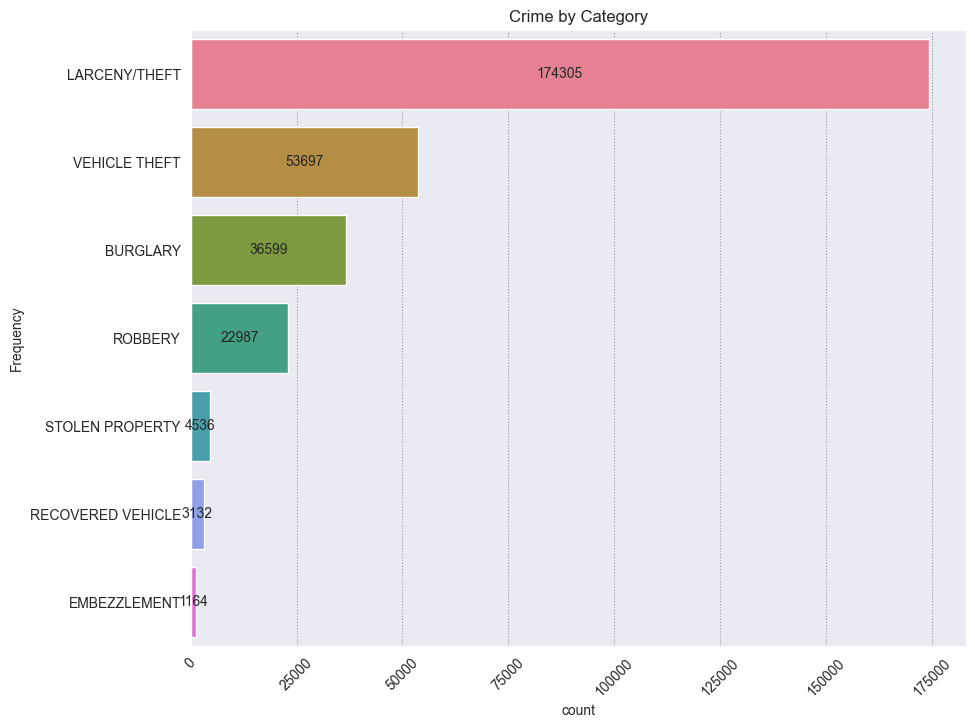

In [276]:
# 도화지 그리기
fig, axs = plt.subplots(figsize=(10, 8))

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

#
train['Category']

# countplot 그리기
sns.countplot(y=train['Category'], palette='husl', order=train['Category'].value_counts().index)

# 라벨, 제목, 틱 설정
container = axs.containers[0]
axs.bar_label(container, label=[f'{x:,.0f}' for x in container.datavalues], label_type='center')
plt.xticks(rotation = 45)
plt.ylabel('Frequency')
plt.title('Crime by Category')
plt.show()

- LARCENY/THEFT는 특히 절도 범죄 외의 전체 범죄 중에 가장 많았다
- 왜 샌프란시스코에서는 다른 종류의 범죄보다 절도 범죄가 많은지 확인이 필요하다

## 3.2 연도별 범죄발생 추이

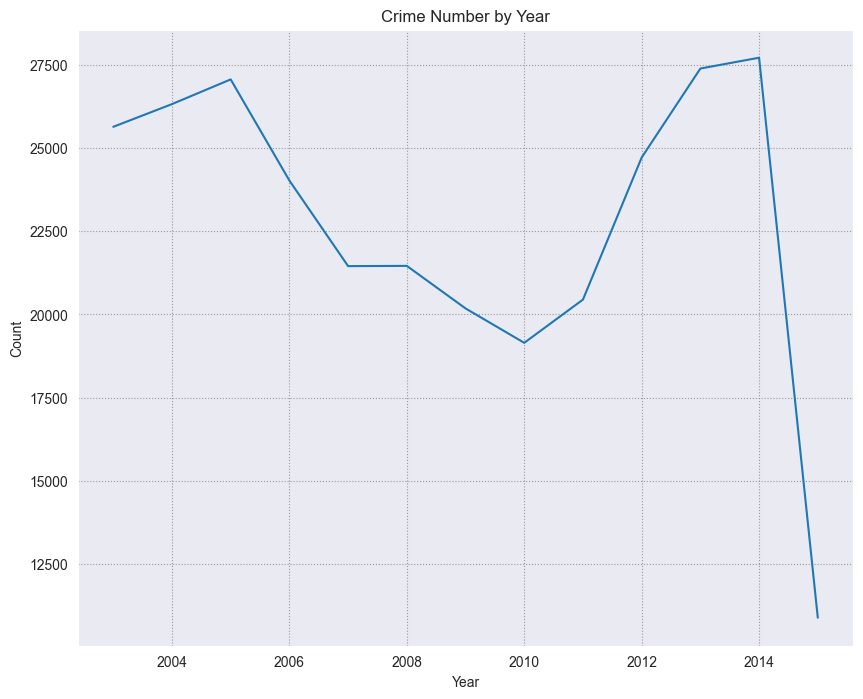

In [232]:
# 도화지
fig = plt.figure(figsize=(10, 8))

# 연도별 범죄수 세기
year_category = train['Category'].groupby(train['year']).count()

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 연도별 범죄수 그래프
sns.lineplot(year_category)

# 라벨, 제목, 틱 설정
container = axs.containers[0]
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crime Number by Year')
plt.show()

- 약 2005년부터 범죄수가 떨어지기 시작하여 2010년까지 범죄가 최저를 기록했다
- 그런데 2010년부터 급격하게 다시 절도 범죄가 증가하는 추세를 보이고 있다
- 왜 2005년부터 2010년까지 범죄가 감소했고 그 이후에는 증가하게 되었는지 원인 분석이 필요하다

## 3.3 월별 범죄발생 추이

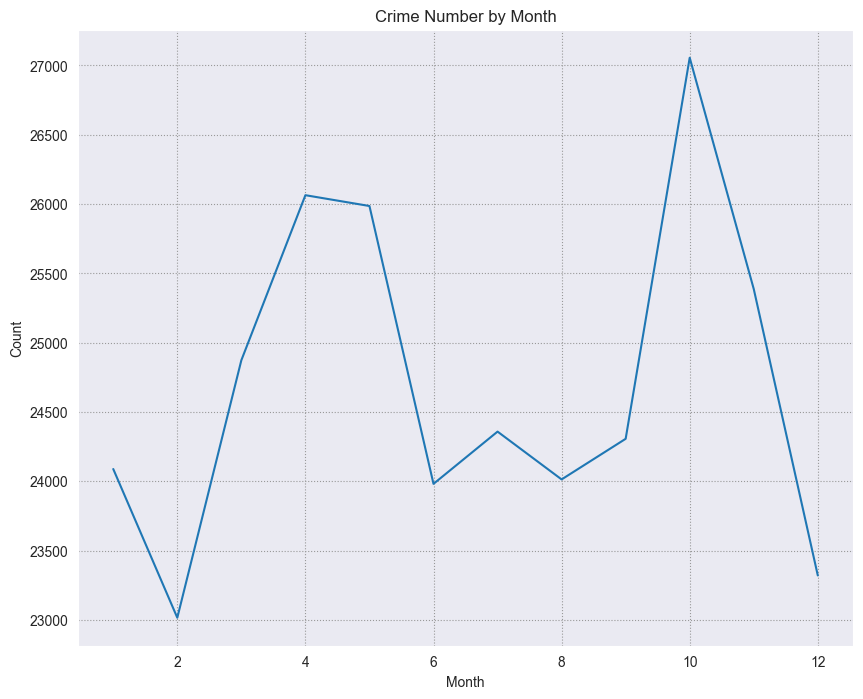

In [233]:
# 도화지
fig = plt.figure(figsize=(10, 8))

# 연도별 범죄수 세기
year_category = train['Category'].groupby(train['month']).count()

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 연도별 범죄수 그래프
sns.lineplot(year_category)

# 라벨, 제목, 틱 설정
container = axs.containers[0]
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Crime Number by Month')
plt.show()

- 4, 5, 10월에 유독 절도 범죄가 높았다
- 어떤 요인으로 범죄수가 봄과 가을에 증가했는지 살펴봐야겠다
- 계절적 요인일 수도 있으니 다음은 계절에 관련하여 그래프로 확인하겠다

## 3.4 일별 범죄발생 추이

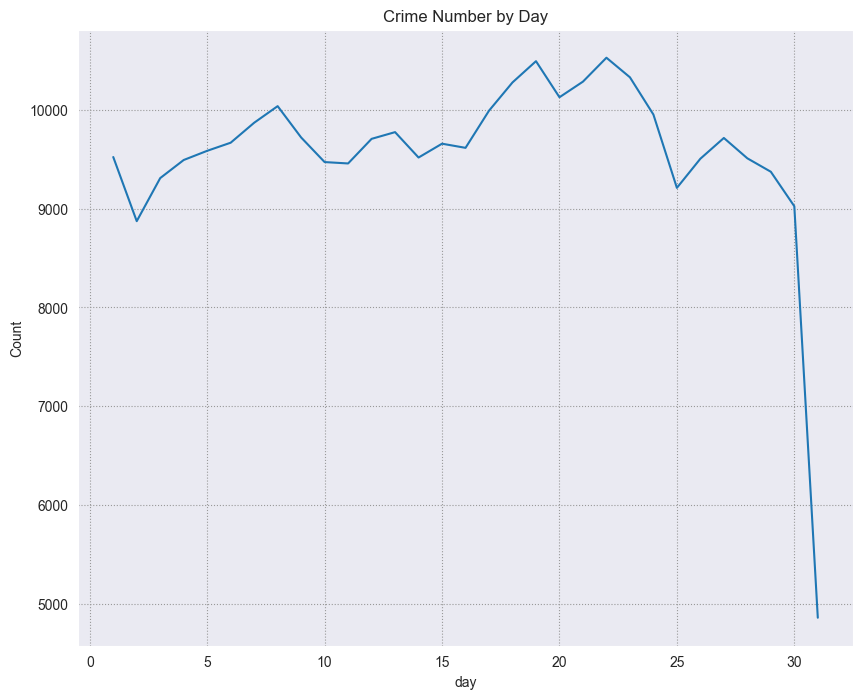

In [234]:
# 도화지
fig = plt.figure(figsize=(10, 8))

# 연도별 범죄수 세기
day_category = train['Category'].groupby(train['day']).count()

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 연도별 범죄수 그래프
sns.lineplot(day_category)

# 라벨, 제목, 틱 설정
container = axs.containers[0]
plt.xlabel('day')
plt.ylabel('Count')
plt.title('Crime Number by Day')
plt.show()

- 31일이 낮은 이유 : 1, 3, 5, 7, 8, 10, 12월에만 존재하기 때문
- 2일이 가장 낮음

## 3.5 시간별 범죄발생 추이

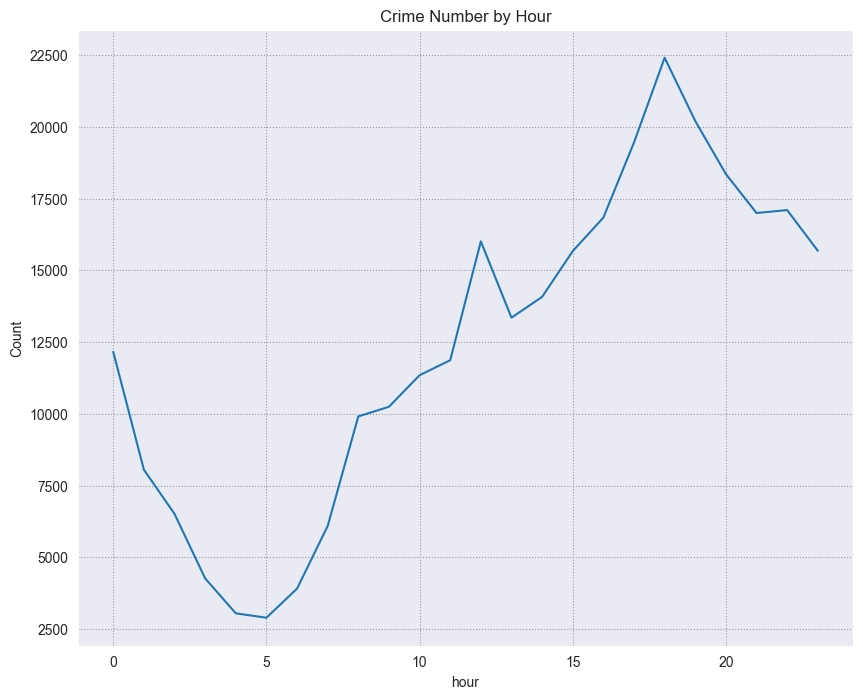

In [235]:
# 도화지
fig = plt.figure(figsize=(10, 8))

# 연도별 범죄수 세기
hour_category = train['Category'].groupby(train['hour']).count()

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 연도별 범죄수 그래프
sns.lineplot(hour_category)

# 라벨, 제목, 틱 설정
container = axs.containers[0]
plt.xlabel('hour')
plt.ylabel('Count')
plt.title('Crime Number by Hour')
plt.show()

## 3.6 분별 범죄발생 추이

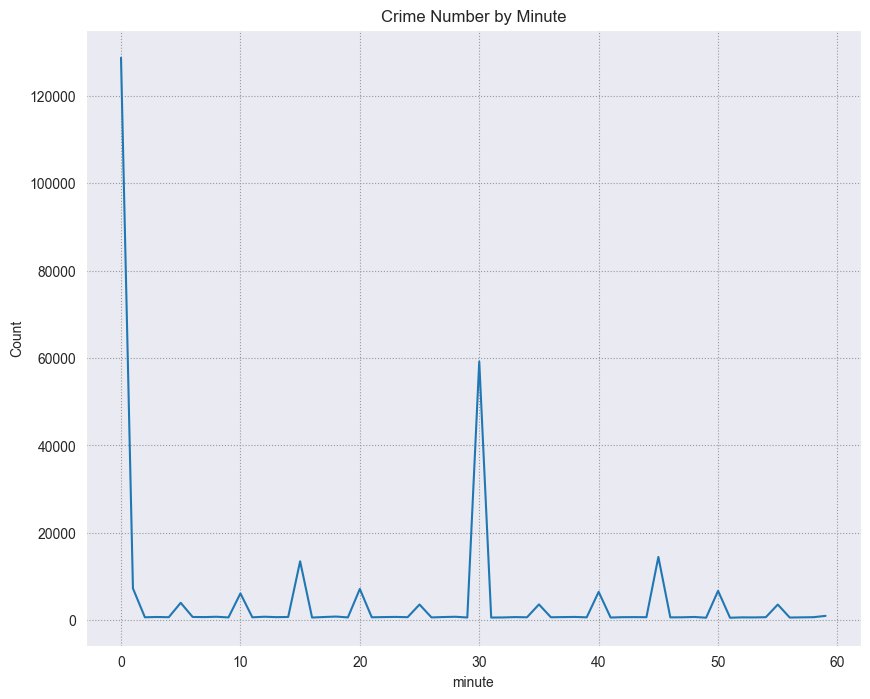

In [236]:
# 도화지
fig = plt.figure(figsize=(10, 8))

# 연도별 범죄수 세기
minute_category = train['Category'].groupby(train['minute']).count()

# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 연도별 범죄수 그래프
sns.lineplot(minute_category)

# 라벨, 제목, 틱 설정
container = axs.containers[0]
plt.xlabel('minute')
plt.ylabel('Count')
plt.title('Crime Number by Minute')
plt.show()

- 정각과 30분에 범죄 발생이 높음

## 3.6 요일별 범죄발생 추이

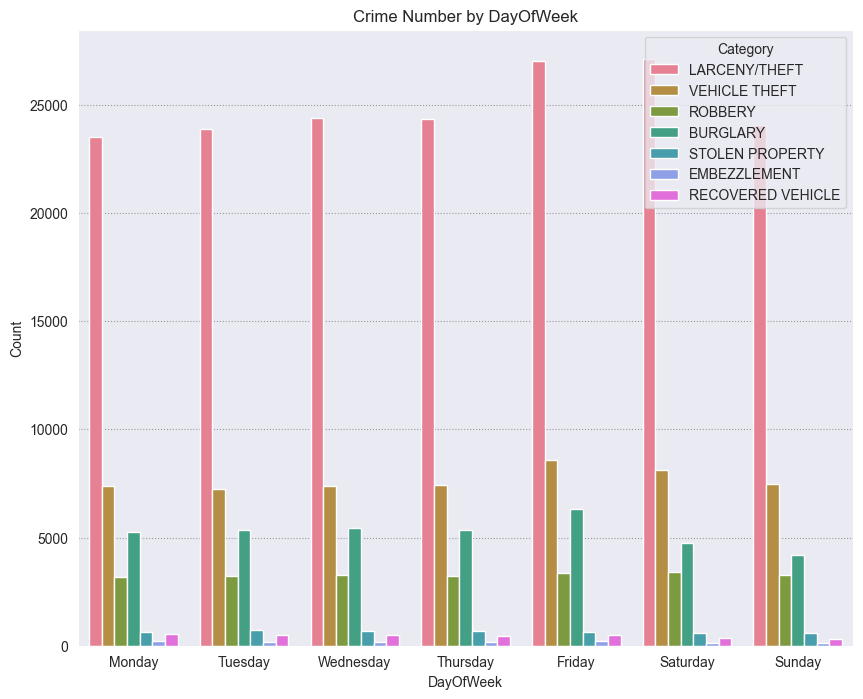

In [352]:
# 도화지
fig = plt.figure(figsize=(10, 8))


# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


# 연도별 범죄수 그래프
axs = sns.countplot(x=train['DayOfWeek'], hue=train['Category'], palette='husl', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# 라벨, 제목, 틱 설정
container = axs.containers[0]
plt.xlabel('DayOfWeek')
plt.ylabel('Count')
plt.title('Crime Number by DayOfWeek')
plt.show()

## 3.6.1 카테고리 유형별 요일별 범죄수

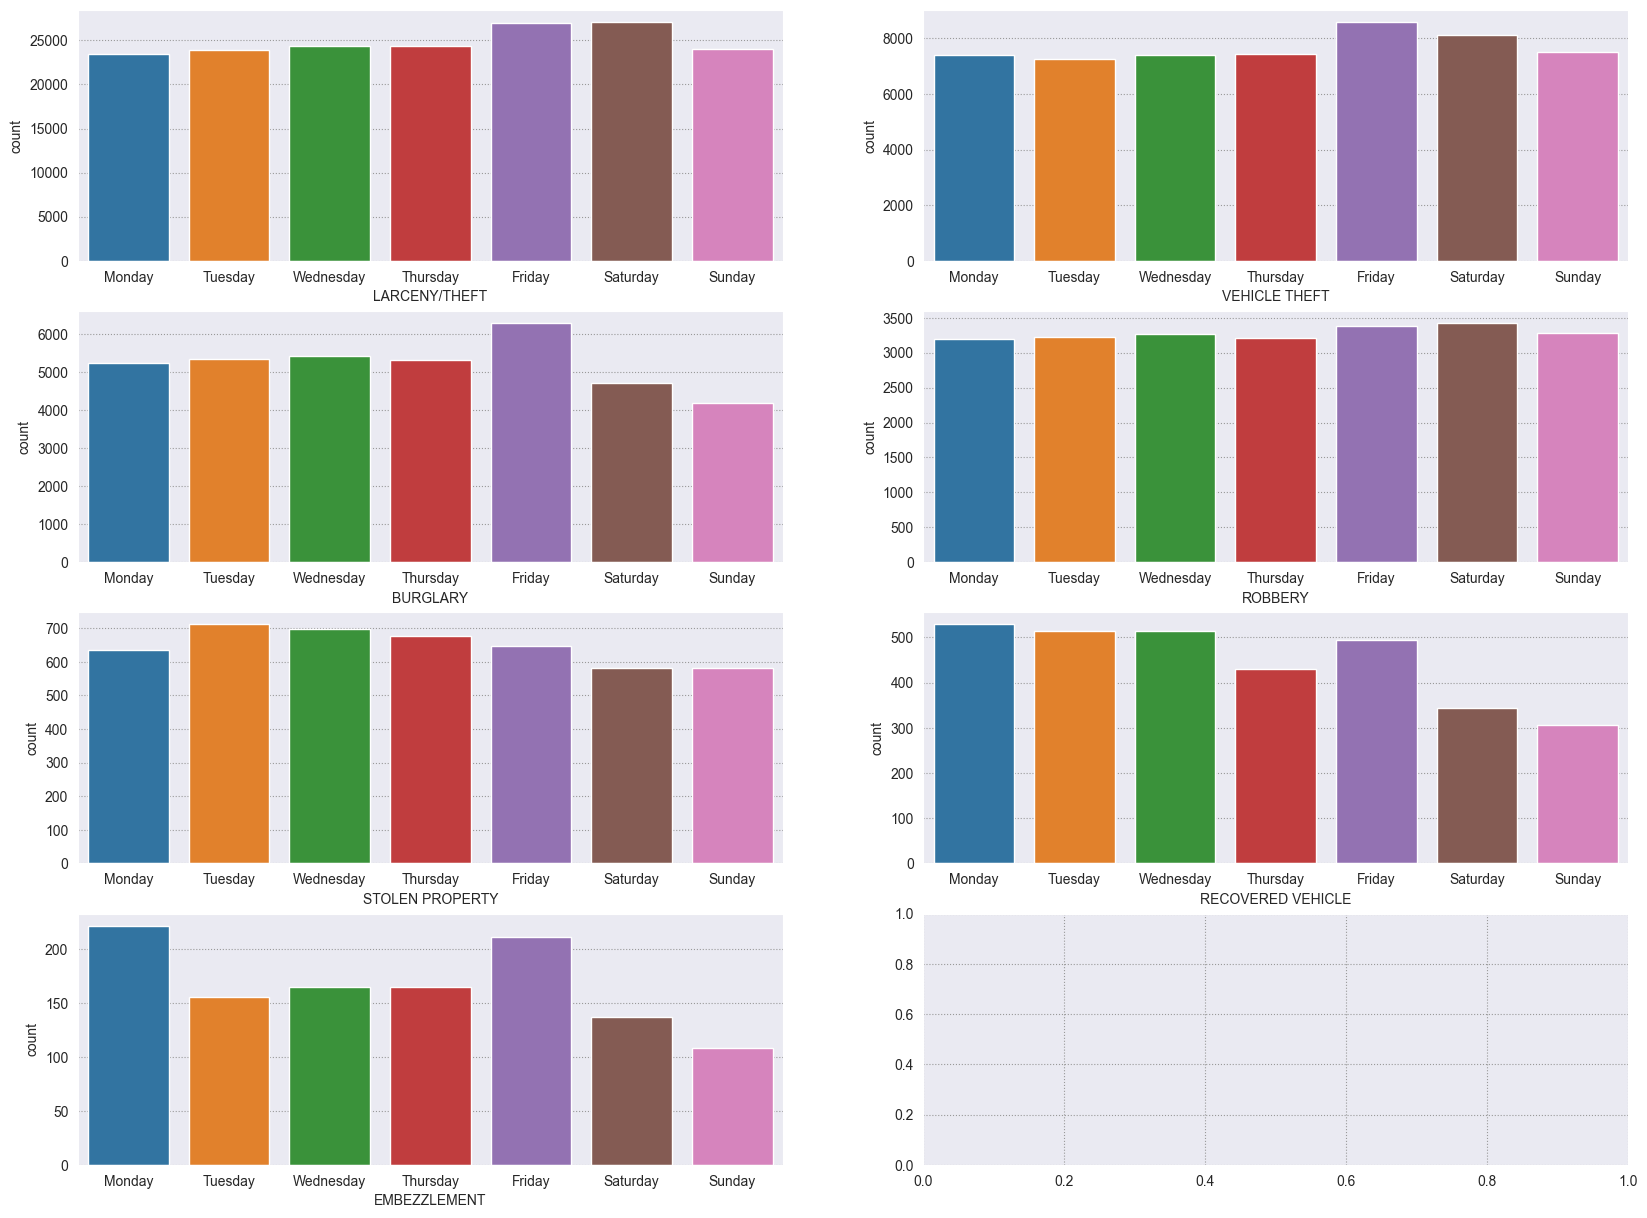

In [356]:
# 도화지와 축 설정
fig, axs = plt.subplots(4, 2, figsize=(20, 15))

# 요일 리스트
week_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 카테고리 유형 리스트
category_list = train['Category'].value_counts().index

# 그래프 그리기
i = 0
for row in range(4):
    for col in range(2):
        if i > 6:
            break
        cate = train[train['Category'] == category_list[i]]
        ax = sns.countplot(x=cate['DayOfWeek'], ax=axs[row][col], order=week_list)
        axs[row][col].set(xlabel = category_list[i])        
        i += 1

- 대부분 금요일에 범죄수가 많다
- LARCENY/THEFT, ROBBERY 주말도 많다

## 3.7 계절별 범죄발생 수

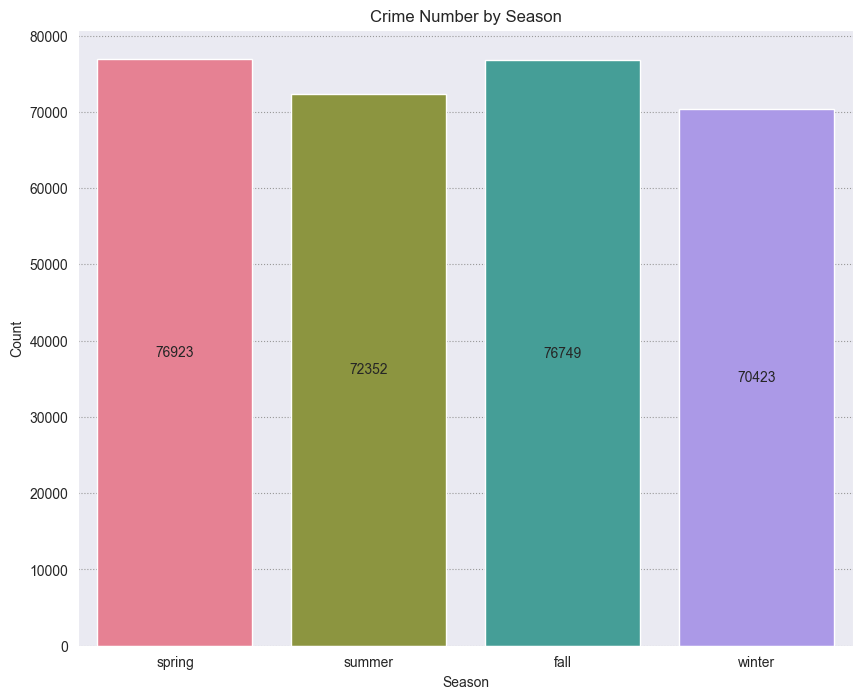

In [248]:
# 도화지 그리기
fig = plt.figure(figsize=(10, 8))

# 계절별 범죄수
axs = sns.countplot(x=train['season'], palette='husl', order=['spring', 'summer', 'fall', 'winter'])


# 그리드, 그리드 색 설정
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# 라벨, 제목, 틱 설정
container = axs.containers[0]
axs.bar_label(container, label=[f'{x:,.0f}' for x in container.datavalues], label_type='center')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Crime Number by Season')

plt.show()

- 계절에 따른 절도 범죄의 수는 거의 일정하므로 계절 데이터로는 유의미한 원인을 찾을 수 없다

## 3.8 히트맵으로 보기

In [404]:
# 히트맵 계산하기 
train_heat = train.groupby(['Category', 'DayOfWeek'])['Dates'].count()
train_heat_pivot = train_corr.unstack()
train_heat_pivot

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
BURGLARY,6301,5239,4732,4205,5336,5356,5430
EMBEZZLEMENT,211,222,137,108,165,156,165
LARCENY/THEFT,27023,23503,27118,24052,24339,23870,24400
RECOVERED VEHICLE,494,529,343,307,429,515,515
ROBBERY,3382,3191,3426,3283,3214,3219,3272
STOLEN PROPERTY,647,636,581,583,678,712,699
VEHICLE THEFT,8596,7401,8106,7496,7447,7260,7391


<AxesSubplot: xlabel='DayOfWeek', ylabel='Category'>

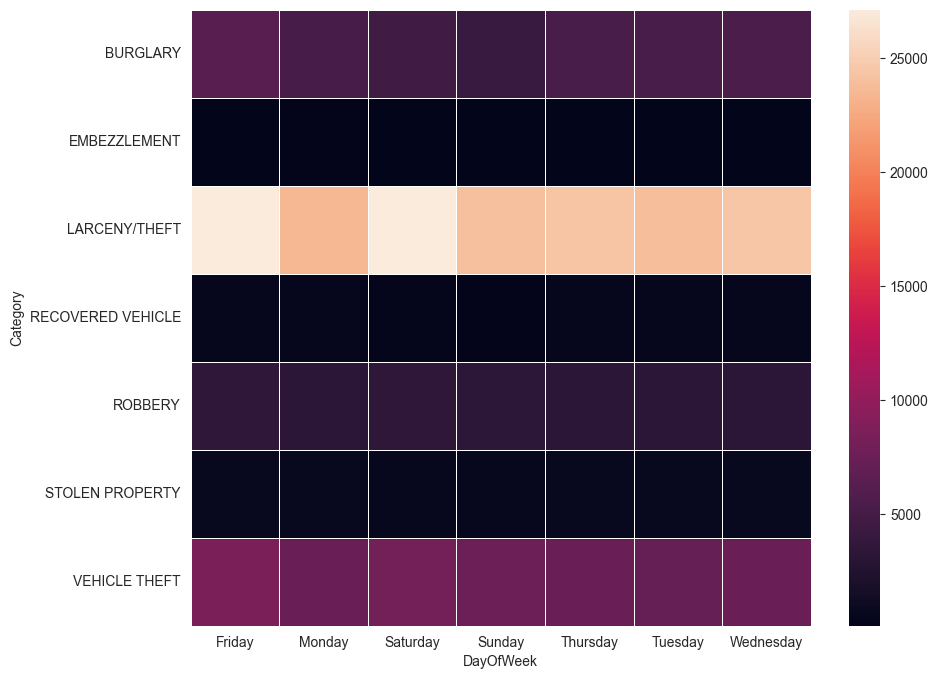

In [405]:
# 히트맵 
plt.figure(figsize=(10,8))

sns.heatmap(data = train_heat_pivot, fmt = '.2f', linewidths=0.5, )

- LARCENY/THEFT는 금요일 토요일에 가장 높음을 알 수 있다

## 3.9 위도 경도 시각화

<AxesSubplot: xlabel='X', ylabel='Y'>

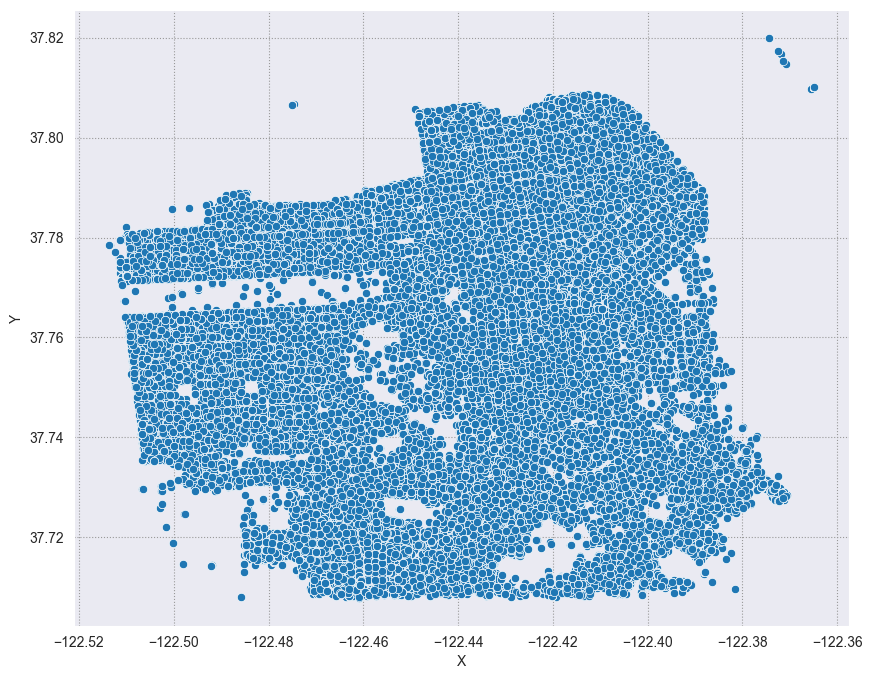

In [262]:
# 위도, 경도 좌표로 그래프 그리기
plt.figure(figsize=(10,8))

sns.scatterplot(x=train['X'], y=train['Y'])

- 이상치(Outlier) 발견
- 이상치 제거해야 함

### Outlier 제거

In [252]:
# 좌표에서 가장 큰 값(이상치)을 확인
train['X'].max(), train['Y'].max()

(-120.5, 90.0)

In [263]:
# 경도 -122보다 낮은 값들만 추출
train = train[train['X'] < -122]
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,day,hour,minute,second,weekday,season
0,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,0,0,spring
1,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,0,0,spring
2,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015,5,13,23,30,0,0,spring
3,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015,5,13,23,30,0,0,spring
4,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,5,13,23,30,0,0,spring


### 시각화

Text(0, 0.5, 'Latitude')

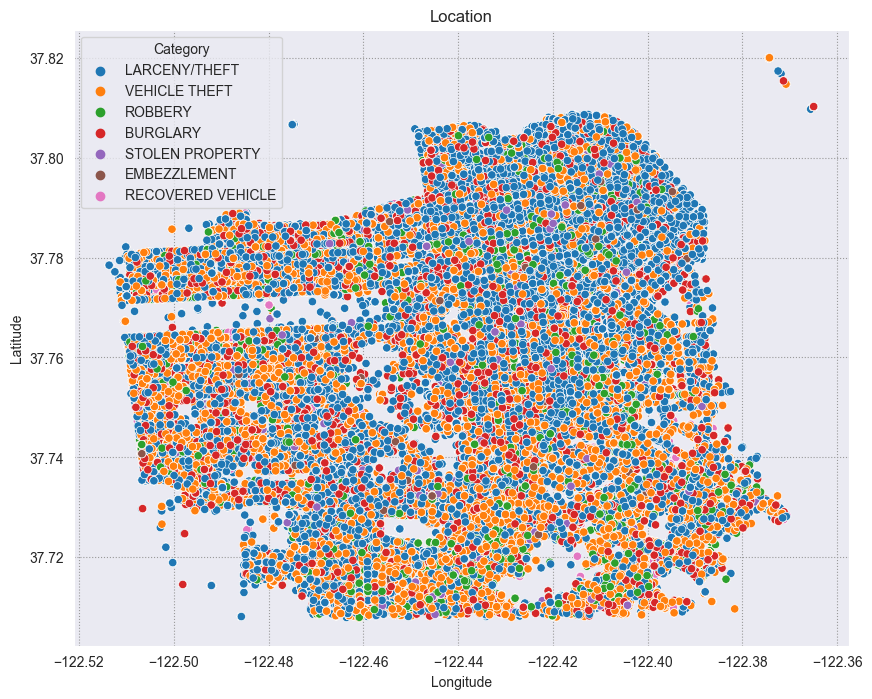

In [266]:
# 도화지 그리기
plt.figure(figsize=(10,8))

# 그래프 그리기
sns.scatterplot(x=train['X'], y=train['Y'], hue=train['Category'])

# 라벨, 제목, 틱 설정
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## 3.10 행정구역별 범죄현황


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000')])

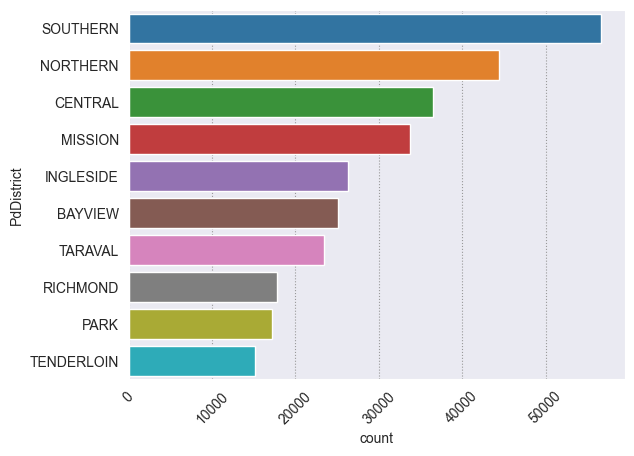

In [412]:
train['PdDistrict'].value_counts()

sns.countplot(y=train['PdDistrict'], order=train['PdDistrict'].value_counts().index)
plt.xticks(rotation=45)

Text(0, 0.5, 'Latitude')

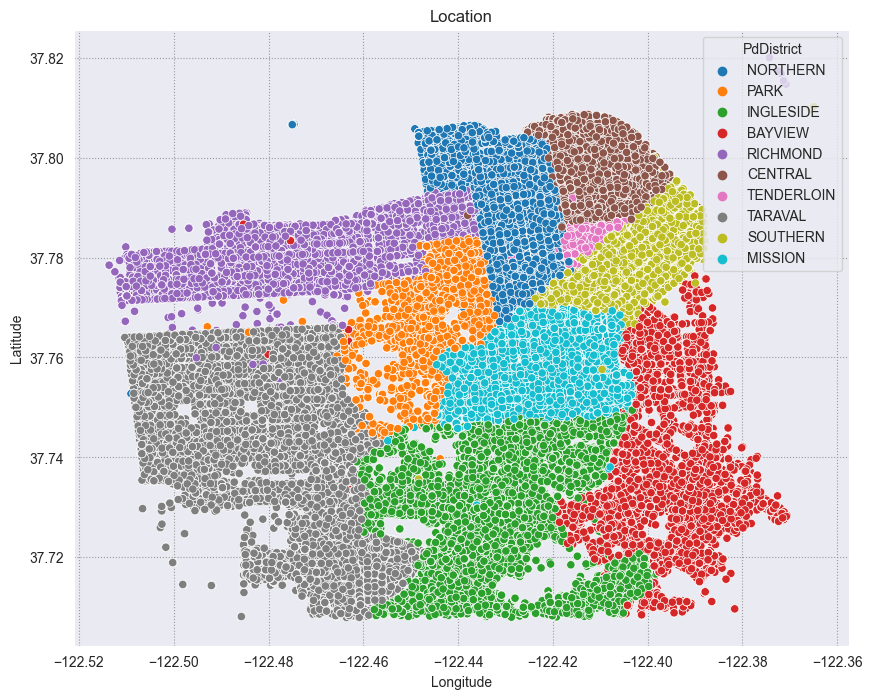

In [418]:
# 도화지 그리기
plt.figure(figsize=(10,8))

# 그래프 그리기
sns.scatterplot(data=train, x='X', y='Y', hue='PdDistrict')

# 라벨, 제목, 틱 설정
plt.title('Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

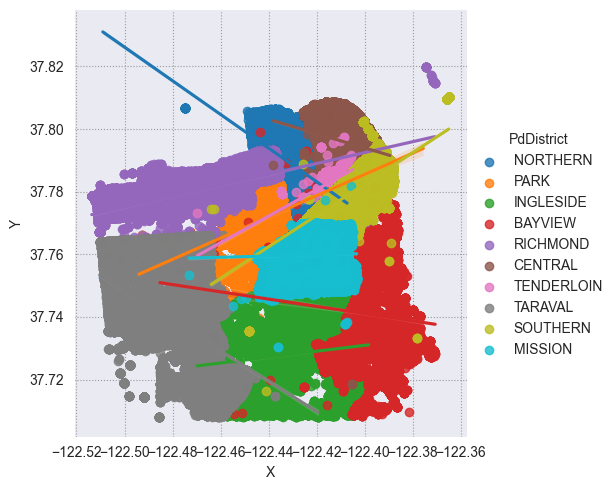

In [417]:
sns.lmplot(data=train, x='X', y='Y', hue='PdDistrict')

## 3.11 행정구역별 범죄유형별 범죄수

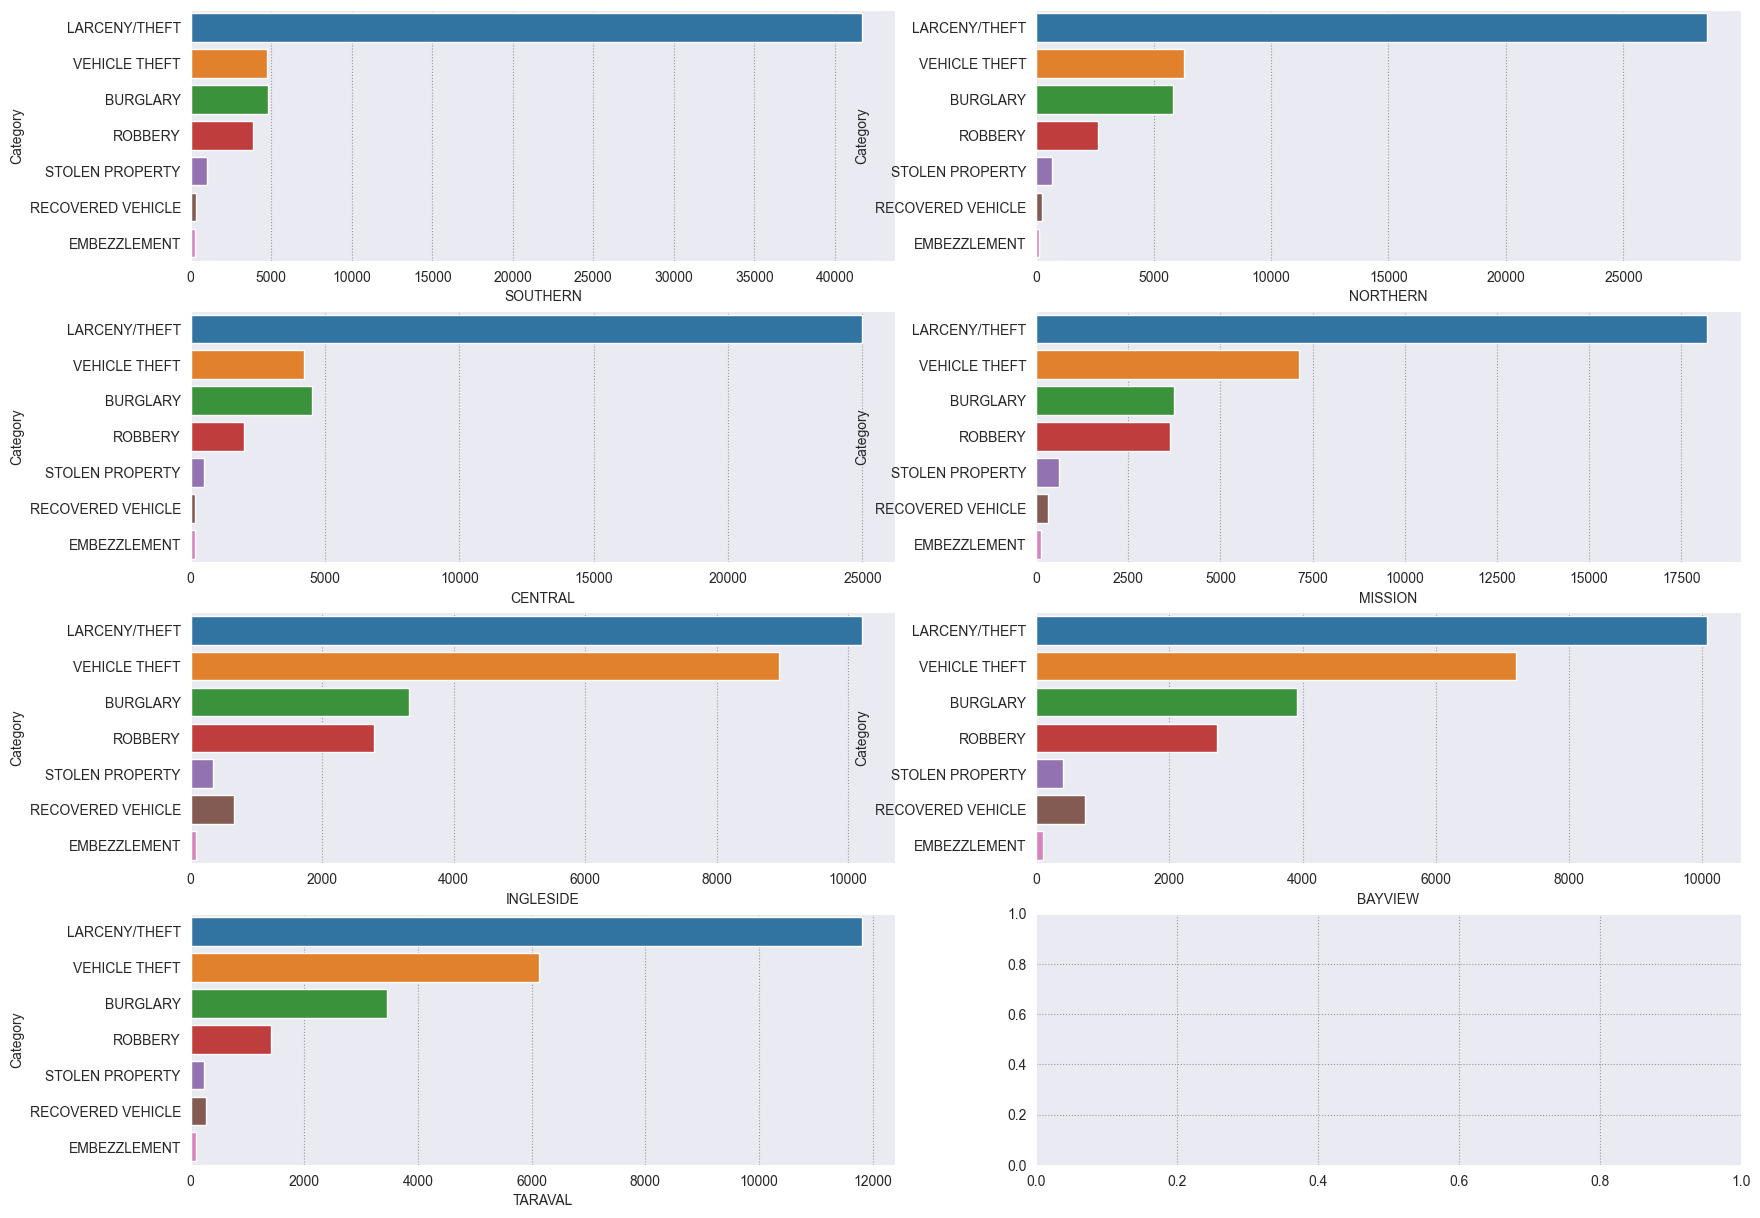

In [433]:
# 도화지와 축 설정
fig, axs = plt.subplots(4, 2, figsize=(20, 15))

# 요일 리스트
# week_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 카테고리 유형 리스트
pd_distirct_list = train['PdDistrict'].value_counts().index

# 그래프 그리기
i = 0
for row in range(4):
    for col in range(2):
        if i > 6:
            break
        pd_dis = train[train['PdDistrict'] == pd_distirct_list[i]]
        ax = sns.countplot(y=pd_dis['Category'], ax=axs[row][col], order=train['Category'].value_counts().index)
        axs[row][col].set(xlabel = pd_distirct_list[i])
        i += 1


In [ ]:
# 도화지와 축 설정
fig, axs = plt.subplots(4, 2, figsize=(20, 15))

# 요일 리스트
# week_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 카테고리 유형 리스트
pd_distirct_list = train['PdDistrict'].value_counts().index

# 그래프 그리기
i = 0
for row in range(4):
    for col in range(2):
        if i > 6:
            break
        pd_dis = train[train['PdDistrict'] == pd_distirct_list[i]]
        ax = sns.countplot(y=pd_dis['Category'], ax=axs[row][col], order=train['Category'].value_counts().index)
        axs[row][col].set(xlabel = pd_distirct_list[i])
        i += 1



## 3.12 범죄유형별 관할별 범죄수

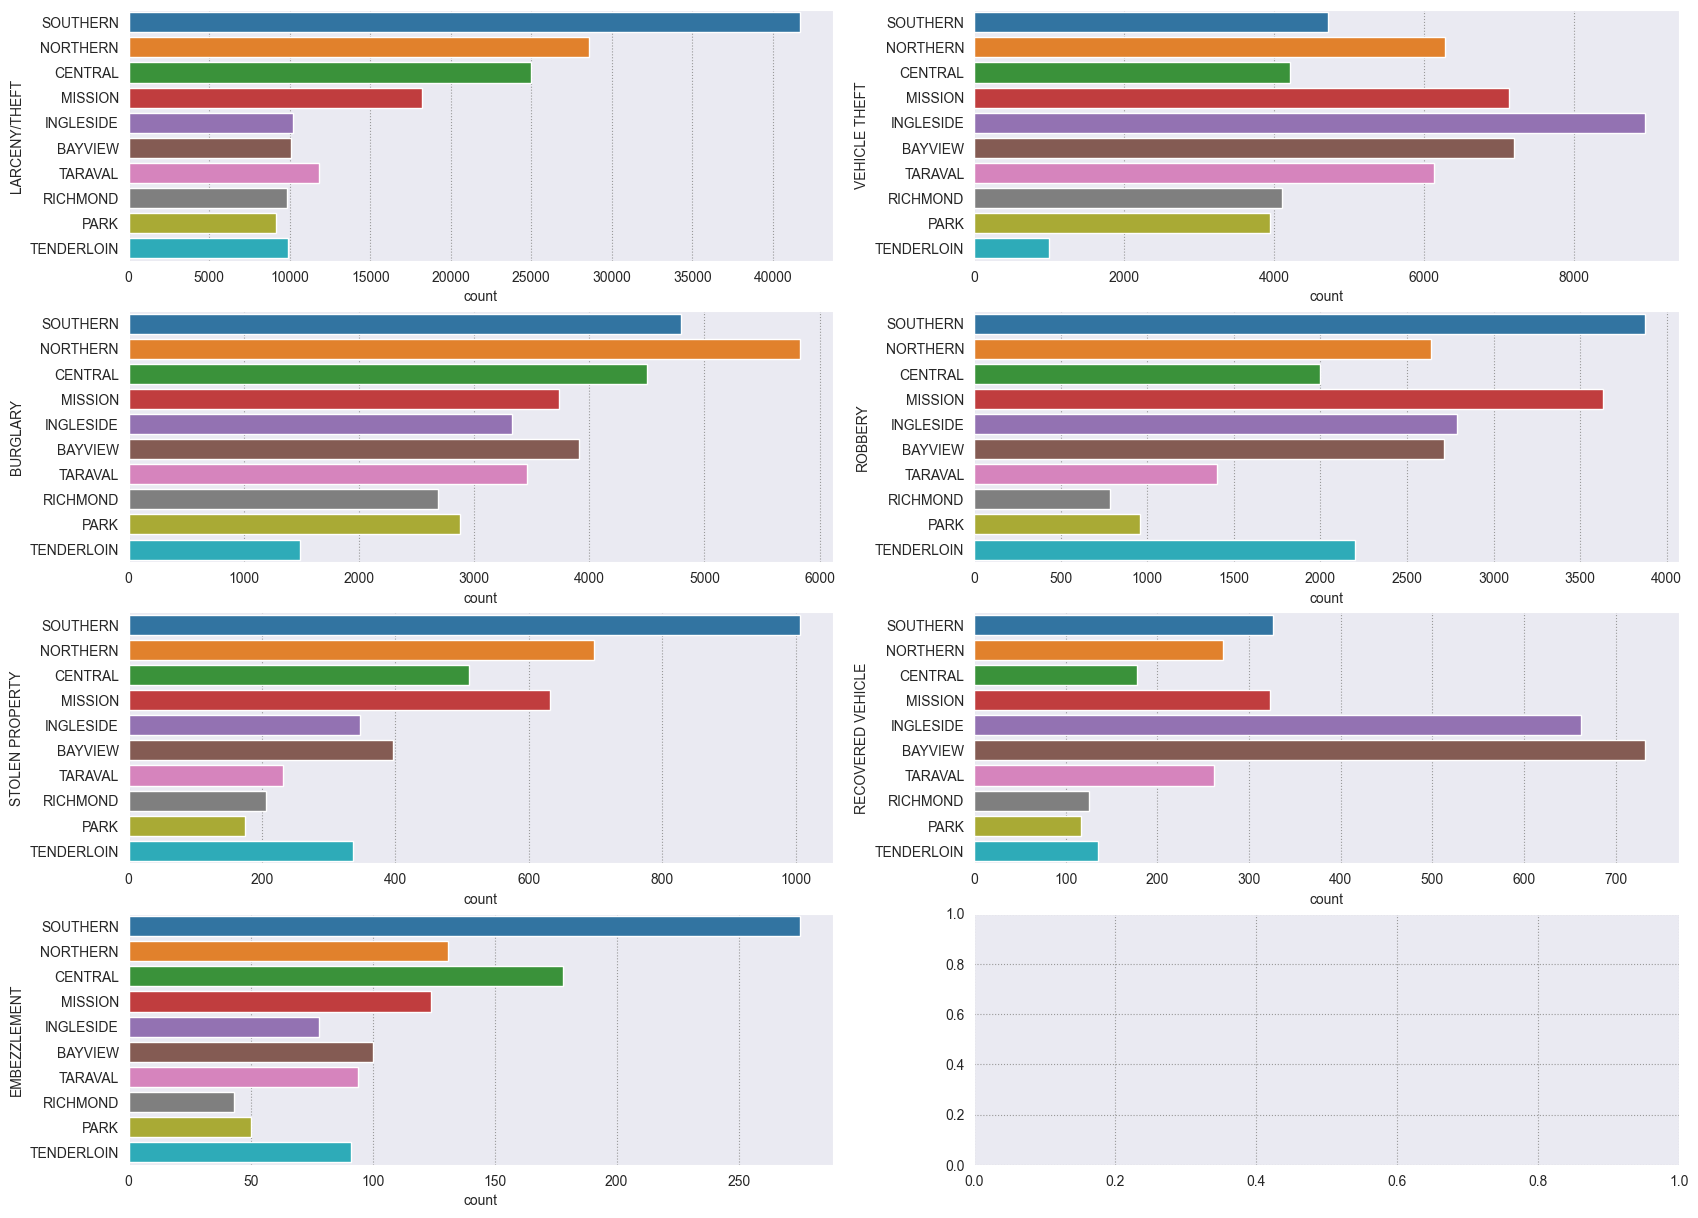

In [437]:
# 도화지와 축 설정
fig, axs = plt.subplots(4, 2, figsize=(20, 15))

# 요일 리스트
# week_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 카테고리 유형 리스트
category_list = train['Category'].value_counts().index

# 그래프 그리기
i = 0
for row in range(4):
    for col in range(2):
        if i > 6:
            break
        cate = train[train['Category'] == category_list[i]]
        ax = sns.countplot(y=cate['PdDistrict'], ax=axs[row][col], order=train['PdDistrict'].value_counts().index)
        axs[row][col].set(ylabel = category_list[i])
        i += 1